In [109]:
import pandas as pd

In [262]:
# filepath = "/data/databases/all_reporting_data.csv"
filepath = "/data/databases/reporting_experiment_results.csv"
df = pd.read_csv(filepath)

In [263]:
df.shape[0], df.dropna().shape[0]

(250424, 17767)

In [295]:
import datetime

def striptime1(x):
    end_date = x
    try:
        return datetime.datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')
    except:
        # Some timestamps also have milliseconds
        return datetime.datetime.strptime(end_date[:-7], '%Y-%m-%d %H:%M:%S')

df['created'] = df['created_utc'].apply(striptime1)
df['ingested'] = df['ingested_utc'].apply(striptime1)

In [265]:
print("Total number of comments ingested by Crossmod during the experiment = ", df.shape[0])
print("Total number of comments reported by Crossmod during the experiment = ", df[df.crossmod_action == "report"].shape[0])
print("% of comments reported by Crossmod during the experiment = ", 100.0 * df[df.crossmod_action == "report"].shape[0]/df.shape[0], "%")
print("Total number of comments removed by moderators during the experiment = ", df[df.banned_by.notna()].shape[0])
print("% of comments removed by moderators during the experiment = ", 100.0 * df[df.banned_by.notna()].shape[0]/df.shape[0], "%")

Total number of comments ingested by Crossmod during the experiment =  250424
Total number of comments reported by Crossmod during the experiment =  2686
% of comments reported by Crossmod during the experiment =  1.07258090278887 %
Total number of comments removed by moderators during the experiment =  17767
% of comments removed by moderators during the experiment =  7.0947672747021056 %


In [266]:
sub_df = df[df.banned_by.notna()]
sub_df['freq'] = sub_df.groupby('banned_by')['banned_by'].transform('count')
sub_df[['banned_by', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,banned_by,freq
12,AutoModerator,10789
20379,Agent_03,1658
518,lughnasadh,1518
20530,iTwalkers,736
2,V2O5,651
1945,lord_stryker,346
41414,Blank-Cheque,315
5092,ion-tom,314
2591,Stuttero,282
40424,KKalebBB,194


In [267]:
df.shape, df[df.agreement_score.notna()].shape

((250424, 12), (250424, 12))

# Automod removals

In [268]:
print("Total number of comments removed by AutoModerator during the experiment = ", df[df.banned_by == "AutoModerator"].shape[0])
print("% of removed comments that were removed by AutoModerator during the experiment = ", int(100.0 * df[df.banned_by == "AutoModerator"].shape[0]/df[df.banned_by.notna()].shape[0]), "%")
print("Number of comments reported by Crossmod that were subsequently removed by AutoModerator during the experiment = " , df[(df.crossmod_action == "report") & (df.banned_by == "AutoModerator")].shape[0])
print("% of comments reported by Crossmod that were subsequently removed by AutoModerator during the experiment = " , int(100.0*df[(df.crossmod_action == "report") & (df.banned_by == "AutoModerator")].shape[0]/df[(df.banned_by == "AutoModerator")].shape[0]), "%")

Total number of comments removed by AutoModerator during the experiment =  10789
% of removed comments that were removed by AutoModerator during the experiment =  60 %
Number of comments reported by Crossmod that were subsequently removed by AutoModerator during the experiment =  304
% of comments reported by Crossmod that were subsequently removed by AutoModerator during the experiment =  2 %


# Human moderator removals

In [269]:
print("Total number of comments removed by human moderators during the experiment = ", df[(df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0])
print("% of removed comments that were removed by human mods during the experiment = ", int(100.0 * df[(df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0]/df[df.banned_by.notna()].shape[0]), "%")
print("Number of comments reported by Crossmod that were subsequently removed by human mods during the experiment = ", df[(df.crossmod_action == "report") & (df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0])
print("% of comments reported by Crossmod that were subsequently removed by human mods during the experiment = ", int(100*df[(df.crossmod_action == "report") & (df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0]/df[(df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0]), "%")

Total number of comments removed by human moderators during the experiment =  6978
% of removed comments that were removed by human mods during the experiment =  39 %
Number of comments reported by Crossmod that were subsequently removed by human mods during the experiment =  1626
% of comments reported by Crossmod that were subsequently removed by human mods during the experiment =  23 %


# Crossmod reports

In [270]:
print("Total number of comments reported by Crossmod during the experiment = ", df[df.crossmod_action == "report"].shape[0])
print("% comments ingested that were reported by Crossmod during the experiment = ", int(100.0 * df[df.crossmod_action == "report"].shape[0]/df.shape[0]), "%")
print("Number of comments reported by Crossmod that were subsequently removed during the experiment = ", df[(df.crossmod_action == "report") & (df.banned_by.notna())].shape[0])
print("% of comments reported by Crossmod that were subsequently removed during the experiment = ", int(100.0 * df[(df.crossmod_action == "report") & (df.banned_by.notna())].shape[0]/df[df.crossmod_action == "report"].shape[0]), "%")

Total number of comments reported by Crossmod during the experiment =  2686
% comments ingested that were reported by Crossmod during the experiment =  1 %
Number of comments reported by Crossmod that were subsequently removed during the experiment =  1930
% of comments reported by Crossmod that were subsequently removed during the experiment =  71 %


# FALSE POSITIVES - 

In [271]:
for comment in df[(df.crossmod_action == "report") & (df.banned_by.isna())].body[:100]:
    print(comment)
    print("----------------------")

Excuuuuuse me for not knowing EVERYTHING like you obviously do.  Eat downvotes, ass.
----------------------
No one cares that you’re a bad person AND unfashionable.
----------------------
Fuck Trump.

And fuck anyone stupid enough to have supported him for even one second.
----------------------
Title Holder: Donald J. Trump “Worst Person Ever Born”
----------------------
Trump one last "fuck you" before he hopefully gets kicked.
----------------------
Things where worse before Obama you dumb Trumper! Seriously you trumpers are ignoring that huge fact! Sorry but dumb fuck trump who wants to dump pesticides in our rivers and lakes can get fucked. He's just mad Obama did it and Obama was a times person of the year.
----------------------
The people who support Trump are disgusting people
----------------------
Dude you brought up greta because you have no arguments not based on outrage porn you swallow. Not,everyone is obsessed with your imagined culture war, its so pathetic.
-----------

# FALSE NEGATIVES - 

In [272]:
for comment in df[(df.crossmod_action != "report") & (df.banned_by.notna())].body[:100]:
    print(comment)
    print("----------------------")

>Nope. They are about in the middle:   
>  
>https://ec.europa.eu/eurostat/statistics-explained/index.php/Electricity\_price\_statistics

Fine was mostly referring to non-former-soviet-bloc nations. Former USSR nations have exceptionally cheap electricity due to lower labor costs and laxer safety / environmental standards. Most of the nations with electricity cheaper than France are primarily coal-based.   


>  
 Germany and Denmark are the most expensive for consumers in this regard, so they are the extreme outliers. Ukraine has electricity 1/4 the price of France, for example. France has electricity prices similar to Sweden, but more expensive than Finland or Iceland, for context..

Finland, Iceland, Norway, etc have cheaper electricity but that is largely due to the vast amount of hydro resources they have. Hydro is definitely cheaper than nuclear under the right circumstances but requires certain geography. Germany is a perfect comparison due to similar geography, climate, develop

# Users who've been reported and removed multiple times

In [273]:
#author posting volumes
sub_df = df
sub_df['freq'] = sub_df.groupby('author')['author'].transform('count')
sub_df[['author', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

,author,freq
84856,CivilServantBot,1431
2957,kernals12,796
1412,OliverSparrow,616
2234,Agent_03,518
114,Memetic1,484
...,...,...
91300,NappingYG,1
91302,AT1313,1
91304,runetrantor,1
91307,BCSteve,1


In [274]:
#author removal volumes
sub_df = df[df.banned_by.notna()]
sub_df['freq'] = sub_df.groupby('author')['author'].transform('count')
sub_df[['author', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,author,freq
24255,only-answer-no,183
8428,PatriotMinear,34
11980,r1xlx,28
6321,Ford456fgfd,24
222081,Speedster4206,23
...,...,...
48308,RickSanchezzC137,1
48318,paulwesley91,1
48329,tidho,1
48346,jmc15john,1


In [275]:
#author reported volumes
sub_df = df[df.crossmod_action == "report"]
sub_df['freq'] = sub_df.groupby('author')['author'].transform('count')
sub_df[['author', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,author,freq
84856,CivilServantBot,24
2101,captain-ding-a-ling,9
225754,Saichotic,9
179706,downvotedreality,8
115136,xcvas,6
...,...,...
73926,gemlarin,1
73809,Fisterbrother,1
73712,Dram1us,1
73502,I_Drink_Diarrhea,1


In [276]:
#author mis-reported volumes
sub_df = df[(df.crossmod_action == "report") & (df.banned_by.notna())]
sub_df['freq'] = sub_df.groupby('author')['author'].transform('count')
sub_df[['author', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,author,freq
2101,captain-ding-a-ling,8
225754,Saichotic,8
179706,downvotedreality,7
115136,xcvas,6
97361,MatrimofRavens,5
...,...,...
69176,Uridon2,1
69101,Jertee,1
69089,ThaneWestbrook,1
69066,neonlightdistrict,1


# Response time - 

In [277]:
df[df.banned_by != "AutoModerator"][["created_utc", "banned_at_utc", "banned_by"]].dropna()

,created_utc,banned_at_utc,banned_by
2,2020-01-22 19:37:22.000000,2020-01-22 20:18:42.000000,V2O5
61,2020-01-22 20:17:40.000000,2020-01-22 20:18:35.000000,V2O5
109,2020-01-22 21:01:40.000000,2020-01-22 23:05:48.000000,V2O5
197,2020-01-22 21:56:42.000000,2020-01-23 02:22:33.000000,ekser
231,2020-01-22 22:22:02.000000,2020-01-23 02:22:26.000000,ekser
...,...,...,...
241928,2020-05-22 10:18:07.000000,2020-05-22 12:17:46.000000,Agent_03
241940,2020-05-22 10:29:09.000000,2020-05-22 12:34:47.000000,Agent_03
241984,2020-05-22 11:20:42.000000,2020-05-22 12:42:38.000000,Agent_03
242466,2020-05-22 15:28:04.000000,2020-05-22 15:59:31.000000,1


In [278]:
import datetime

sub_df = df.dropna()
created = []
banned = []
misses = 0

def striptime1(x):
    end_date = x
    try:
        return datetime.datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')
    except:
        return datetime.datetime.strptime(end_date[:-7], '%Y-%m-%d %H:%M:%S')

sub_df['created'] = sub_df['created_utc'].apply(striptime1)
sub_df['banned'] = sub_df['banned_at_utc'].apply(striptime1)

sub_df['response_time'] = sub_df['banned'] - sub_df['created']

seconds = []
for x in sub_df['response_time']:
    seconds.append(x.total_seconds())
    
sub_df['response_time'] = seconds

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a 

In [279]:
sub_df = sub_df[sub_df.banned_by != "AutoModerator"]
sub_df.response_time.mean(), sub_df.response_time.median(), sub_df.response_time.max(), sub_df.response_time.min()

(367789.1319862425, 20554.5, 8811679.0, 0.0)

In [281]:
20554/3600

5.709444444444444

In [199]:
sub_df.shape[0]

9259

In [208]:
df.shape[0], df[df['agreement_score'] >= 0.9].shape[0], df[df['agreement_score'] >= 0.7].shape[0]

(367567, 2383, 19078)

In [243]:
df[(df['crossmod_action'] == "report") & (df.agreement_score < 0.7)].shape[0]

34954

In [242]:
df[(df['crossmod_action'] == "report") & (df.agreement_score < 0.7)]['norm_violation_score'].median()

0.0

In [256]:
df[(df['crossmod_action'] == "report") & (df.agreement_score < 0.85)]['created_utc'].max()

'2020-01-17 18:40:42.000000'

In [240]:
sub_df.shape[0]

250424

# Plots

In [342]:
import matplotlib.pyplot as plt
import seaborn

# Plot Parameters

# Agreement Score Parameters: Choose starting and ending agreement score thresholds, and how many intervals between them.
agreement_score_start = 50
agreement_score_end = 100
delta = 5
agreement_scores = [i * 0.01 for i in range(agreement_score_start, agreement_score_end, delta)]

# Finding the starting and ending ingested_utc in the dataset
min_date = df['ingested'].min()
max_date = df['ingested'].max()

## Agreement Score vs. Number of Comments

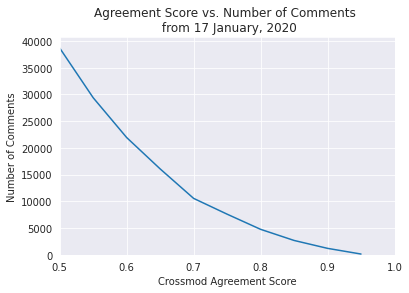

In [343]:
#Agreement Scores vs. Number of Comments
def comments_at_threshold(agreement_score_threshold):
    return df[(df.agreement_score >= agreement_score_threshold)].shape[0]    
number_of_comments = [comments_at_threshold(i) for i in agreement_scores]
x_axis = 'agreement_score'
y_axis = 'number_of_comments'
line_plot_df = pd.DataFrame({x_axis: agreement_scores, y_axis: number_of_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Agreement Score vs. Number of Comments \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel('Crossmod Agreement Score')
line_plot.set_ylabel('Number of Comments')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(agreement_score_start*0.01, agreement_score_end*0.01)
plt.ylim(0, max(number_of_comments) + 2000)
##############################################################
plt.show()

## Agreement Score vs. Number of True Positives

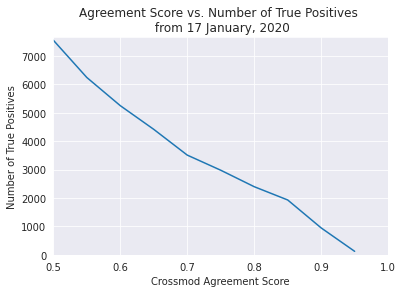

In [344]:
#Agreement Scores vs. Number of True Positives
def true_positives_at_threshold(agreement_score_threshold):
    return df[(df.agreement_score >= agreement_score_threshold) & (df.banned_by.notnull())].shape[0] 
number_of_true_positives = [true_positives_at_threshold(i) for i in agreement_scores]
x_axis = 'agreement_score'
y_axis = 'number_of_true_positives'
line_plot_df = pd.DataFrame({x_axis: agreement_scores, y_axis: number_of_true_positives},columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Agreement Score vs. Number of True Positives \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel('Crossmod Agreement Score')
line_plot.set_ylabel('Number of True Positives')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(agreement_score_start*0.01, agreement_score_end*0.01)
plt.ylim(0, max(number_of_true_positives) + 100)
##############################################################
plt.show()

## Agreement Score vs. Ratio of True Positives to Total Comments at Threshold

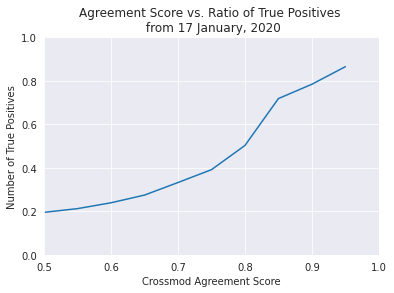

In [345]:
#Agreement Scores vs. Ratio of True Positives
def ratio_of_true_positives(agreement_score_threshold):
    true_positives = df[(df.agreement_score >= agreement_score_threshold) & (df.banned_by.notnull())].shape[0] 
    total_at_threshold = df[(df.agreement_score >= agreement_score_threshold)].shape[0]
    return true_positives / total_at_threshold
ratios = [ratio_of_true_positives(i) for i in agreement_scores]
x_axis = 'agreement_score'
y_axis = 'ratios'
line_plot_df = pd.DataFrame({x_axis: agreement_scores, y_axis: ratios}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Agreement Score vs. Ratio of True Positives \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel('Crossmod Agreement Score')
line_plot.set_ylabel('Number of True Positives')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(agreement_score_start*0.01, agreement_score_end*0.01)
plt.ylim(0*0.01, 100*0.01)
##############################################################
plt.show()

## Rate of Total Comments

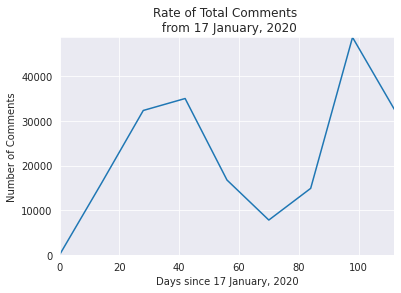

In [361]:
# Rate of Total Comments
def comments_between_dates(start_date, end_date):
    return df[(df.ingested >= start_date) & (df.ingested < end_date)].shape[0]
##############################################################
# Change bucket size (in days) for a smoother rate
##############################################################
bucket_size = 14
##############################################################
dates = [i for i in range(int((max_date - min_date).days/bucket_size))]
dates = [ i * bucket_size for i in dates]
number_of_comments = [0] + [comments_between_dates(min_date + datetime.timedelta(days = dates[i - 1]),
                                                   min_date + datetime.timedelta(days = dates[i])) 
                            for i in range(1, len(dates))]
x_axis = 'days'
y_axis = 'number_of_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: number_of_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Rate of Total Comments \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}')
line_plot.set_ylabel(f'Number of Comments')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(number_of_comments))
##############################################################
plt.show()

In [354]:
for i in range(0, len(ratios)):
    print("Threshold >= , ", agreement_scores[i] ," => True positive rate = ", ratios[i])

Threshold >= ,  0.5  => True positive rate =  0.1952537290282553
Threshold >= ,  0.55  => True positive rate =  0.21237281791268248
Threshold >= ,  0.6  => True positive rate =  0.23925429600255252
Threshold >= ,  0.65  => True positive rate =  0.2746842530952529
Threshold >= ,  0.7000000000000001  => True positive rate =  0.33244907626717196
Threshold >= ,  0.75  => True positive rate =  0.39155596475075627
Threshold >= ,  0.8  => True positive rate =  0.5028319697923223
Threshold >= ,  0.85  => True positive rate =  0.7185405807892777
Threshold >= ,  0.9  => True positive rate =  0.7844112769485904
Threshold >= ,  0.9500000000000001  => True positive rate =  0.8652482269503546


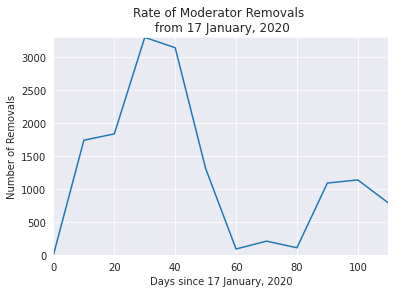

In [367]:
# Rate of Moderator Removals
def comments_moderated_between_dates(start_date, end_date):
    return df[(df.ingested >= start_date) & (df.ingested < end_date) & (df.banned_by.notnull())].shape[0]
##############################################################
# Change bucket size (in days) for a smoother rate
##############################################################
bucket_size = 10
##############################################################
dates = [i for i in range(int((max_date - min_date).days/bucket_size))]
dates = [ i * bucket_size for i in dates]
number_of_moderated_comments = [0] + [comments_moderated_between_dates(min_date + datetime.timedelta(days = dates[i - 1]),
                                                   min_date + datetime.timedelta(days = dates[i])) 
                            for i in range(1, len(dates))]
x_axis = 'days'
y_axis = 'number_of_moderated_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: number_of_moderated_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Rate of Moderator Removals \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}')
line_plot.set_ylabel(f'Number of Removals')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(number_of_moderated_comments))
##############################################################
plt.show()

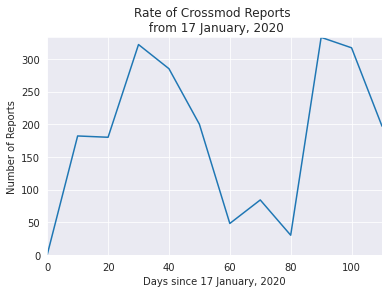

In [368]:
# Rate of Crossmod Reports
def comments_reported_between_dates(start_date, end_date):
    return df[(df.ingested >= start_date) & (df.ingested < end_date) & (df.crossmod_action == "report")].shape[0]
##############################################################
# Change bucket size (in days) for a smoother rate
##############################################################
bucket_size = 10
##############################################################
dates = [i for i in range(int((max_date - min_date).days/bucket_size))]
dates = [ i * bucket_size for i in dates]
number_of_reported_comments = [0] + [comments_reported_between_dates(min_date + datetime.timedelta(days = dates[i - 1]),
                                                   min_date + datetime.timedelta(days = dates[i])) 
                            for i in range(1, len(dates))]
x_axis = 'days'
y_axis = 'number_of_reported_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: number_of_reported_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Rate of Crossmod Reports \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}')
line_plot.set_ylabel(f'Number of Reports')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(number_of_reported_comments))
##############################################################
plt.show()

In [ ]:
# Rate of Report Removal Sequences
def comments_reported_and_removed_between_dates(start_date, end_date):
    return df[(df.ingested >= start_date) & (df.ingested < end_date) & (df.crossmod_action == "report") & (df.banned_by.notnull())].shape[0]
##############################################################
# Change bucket size (in days) for a smoother rate
##############################################################
bucket_size = 10
##############################################################
dates = [i for i in range(int((max_date - min_date).days/bucket_size))]
dates = [ i * bucket_size for i in dates]
number_of_reported_and_removed_comments = [0] + [comments_reported_and_removed_between_dates(min_date + datetime.timedelta(days = dates[i - 1]),
                                                   min_date + datetime.timedelta(days = dates[i])) 
                            for i in range(1, len(dates))]
x_axis = 'days'
y_axis = 'number_of_reported_and_removed_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: number_of_reported_and_removed_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Rate of Report Removal Sequences \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}')
line_plot.set_ylabel(f'Number of Reports')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(number_of_reported_comments))
##############################################################
plt.show()